In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
from google.colab import drive
drive.mount('/content/ym')

Mounted at /content/ym


**Memory footprint support libraries/code**

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=a976f75796352cae0e9e3652dd904c9fbda7e4aa550d61af9677cfec2dfb28bf
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


IndexError: ignored

**To avoid colab 30/90 mins interruption**

In [ ]:


'''
function ClickConnect(){

console.log("Working");

document.querySelector("colab-toolbar-button#connect").click()

}

setInterval(ClickConnect,60000)

'''


**Experiment **

In [4]:
pip install SimpleITK

     |████████████████████████████████| 47.4MB 91kB/s 


In [5]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt


path = '/content/ym/MyDrive/Colab Notebooks/Subject/1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308124493341905600418.mhd'



itk_image = sitk.ReadImage(path,sitk.sitkFloat32)
image_array = sitk.GetArrayViewFromImage(itk_image)

print(image_array)
print('fgffgtrfhgtrh')

ct_scan = sitk.GetArrayFromImage(itk_image)
print(ct_scan)

# print the image's dimensions
print(image_array.shape)
print(image_array.ndim)
print(image_array.dtype)

# print the image's dimensions
print(ct_scan.shape)
print(ct_scan.max())
print(ct_scan.dtype)



[[[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

 ...

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -30

Show 3d images using matplotlib 

In [6]:
def myshow(img, title=None, margin=0.05, dpi=80 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    
    
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
   
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

In [7]:
img1_seg = sitk.ReadImage(path)

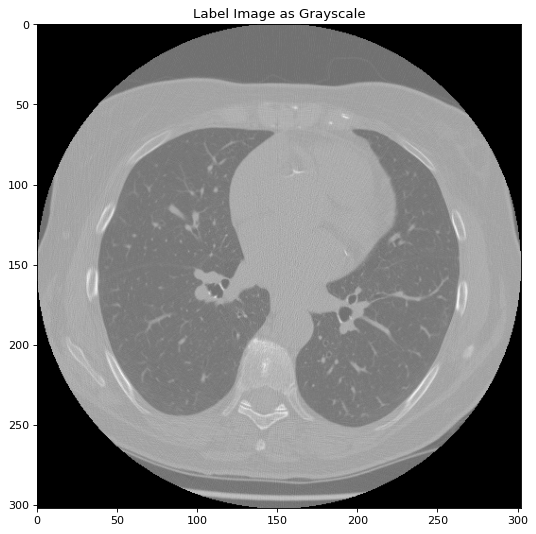

In [8]:
myshow(img1_seg, "Label Image as Grayscale")

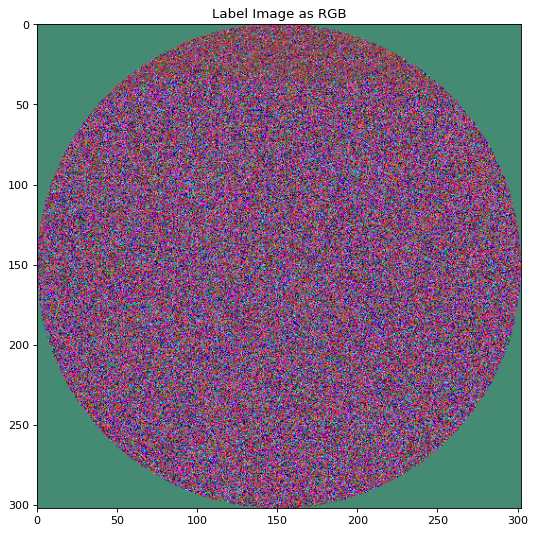

In [9]:
myshow(sitk.LabelToRGB(img1_seg), title="Label Image as RGB")

In [10]:
def showImage(nda, spacing, title=None, margin=0.05, dpi=80 ):
    nda = nda
    spacing = spacing
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
   
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

In [11]:
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def load_images_with_itk(filename):

    itkimage = sitk.ReadImage(filename)
    
    np_image = sitk.GetArrayFromImage(itkimage)
    
    origin = np.array(list(reversed(itkimage.GetOrigin())))
    
    spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return np_image, origin, spacing

#Center : centers of circles px -- list of coordinates x,y,z
#diam : diameters of circles px -- diameter
#widthXheight : pixel dim of image
#spacing = mm/px conversion rate np array x,y,z
#origin = x,y,z mm np.array
#z = z position of slice in world coordinates mm
    

In [13]:
def make_mask(center,diam,z,width,height,spacing,origin):

    print('in make mask ......center', center)
    print('in make mask ......diameter',diam)
    print('in  make mask ......z ', z)
    print('in make mask ......width', width)
    print('in make mask ......height', height)
    print('in make mask ......spacing', spacing)
    print('in  make mask ......origin', origin)


    mask = np.zeros([height,width]) # 0's everywhere except nodule swapping x,y to match img

    #convert to nodule space from world coordinates

    # Defining the voxel range in which the nodule falls
    v_center = (center-origin)/spacing
    v_diam = int(diam/spacing[0]+5)
    v_xmin = np.max([0,int(v_center[0]-v_diam)-5])
    v_xmax = np.min([width-1,int(v_center[0]+v_diam)+5])
    v_ymin = np.max([0,int(v_center[1]-v_diam)-5])
    v_ymax = np.min([height-1,int(v_center[1]+v_diam)+5])

    v_xrange = range(v_xmin,v_xmax+1)
    v_yrange = range(v_ymin,v_ymax+1)

    # Convert back to world coordinates for distance calculation
    x_data = [x*spacing[0]+origin[0] for x in range(width)]
    y_data = [x*spacing[1]+origin[1] for x in range(height)]

    # Fill in 1 within sphere around nodule
    for v_x in v_xrange:
        for v_y in v_yrange:
            p_x = spacing[0]*v_x + origin[0]
            #print('p_x===', p_x, 'origin [0]===',origin[0])

            p_y = spacing[1]*v_y + origin[1]
            #print('p_y===',p_y,'origin [1]===',origin[1])

            if np.linalg.norm(center-np.array([p_x,p_y,z]))<=diam:
                mask[int((p_y-origin[1])/spacing[1]),int((p_x-origin[0])/spacing[0])] = 1.0
                #print(' n hmjlkjlvllvlu   ', mask.shape)
    return(mask)

In [14]:
def normalizePlanes(npzarray):
    maxHU = 400
    minHU = -1000 
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    npzarray *= 255
    return npzarray.astype(int)

Using annotation.csv file

In [15]:
csv='/content/ym/MyDrive/Colab Notebooks/Subject/annotations.csv'
dir='/content/ym/MyDrive/Colab Notebooks/Subject/'

file_list = glob(dir +"*.mhd")

def get_filename(file_list, case):
    for f in file_list:
        if case in f:
           print('ffff  ', f)
           return(f)

print ('reading csv...')
df_anno = pd.read_csv(csv)
print('After reading  ', df_anno)
df_anno["file"] = df_anno["seriesuid"].map(lambda file_name: get_filename(file_list, file_name))
print('After mapping   ',df_anno)
print('After mapping ---- coordinate X   ',df_anno['coordX'])
print('After mapping ---- file   ',df_anno['file'])
df_anno = df_anno.dropna()
print('After dropna ---- coordinate x   ',df_anno['coordX'])
print('After dropna ------ File  ',df_anno['file'])
print('After dropna ------ df  ',df_anno)



reading csv...
After reading                                                 seriesuid  ...  diameter_mm
0     1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  ...     5.651471
1     1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  ...     4.224708
2     1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...  ...     5.786348
3     1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  ...     8.143262
4     1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  ...    18.545150
...                                                 ...  ...          ...
1181  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...  ...     5.053694
1182  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...  ...     4.556101
1183  1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...  ...     4.357368
1184  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  ...     4.277203
1185  1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...  ...    23.802913

[1186 rows x 5 columns]
ffff   /content/ym/MyDrive/Colab Notebooks/Subject/1.3.6

In [16]:
def images_with_masks(path):
   
    out_images = '/content/ym/MyDrive/Colab Notebooks/Output/Output_images/'
    out_masks  = '/content/ym/MyDrive/Colab Notebooks/Output/Output_masks/'
    
    for filename in os.listdir(path):
       print('path for folder >>>>>', path)
       
       if filename.endswith("mhd"):
          url = path + filename
          print('path for image >>>>', url)
           
          print(' df =======  ', df_anno.head(4))
          print(' df file =======  ', df_anno['file'].head(4))

          mini_df = df_anno.loc[df_anno['file']== url] #get all nodules associate with file
          print('mini df =======  ', mini_df.head(6))

   
          #Images 
          img, origin, spacing = load_images_with_itk(url)
          num_z, height, width = img.shape

          print('img shape ,,,,,,',img.shape, num_z, height, width)

          print ('img array', img)
          
        
          #images[img] = images
          #print('images after adding img ,,,,,,',images)
 
          #plt.subplot(1,2,1)
          #showImage(img,spacing,"Label Image as Grayscale")


          # Masks
          for node_idx, cur_row in mini_df.iterrows():
              node_x = cur_row["coordX"]
              node_y = cur_row["coordY"]
              node_z = cur_row["coordZ"]
              diam   = cur_row["diameter_mm"]
          

              print(' X....... ', node_x)
              print(' Y...... ', node_y)
              print(' Z........', node_z)
              print(' dia ..... ', diam)

              images = np.ndarray([3,height,width],dtype=np.float32)
              print('images shape ,,,,,,',images.shape)

              masks = np.ndarray([3,height,width],dtype=np.uint8)
              print('masks dimention,,,,,,',masks.ndim)
              
              print('ffffffffffff',node_idx)
              center = np.array([node_x, node_y, node_z])   # nodule center
              print('center', center)

              v_center = np.rint((center-origin)/spacing)  # nodule center in voxel space (still x,y,z ordering)
              print('v  center', v_center)

              for i, i_z in enumerate(np.arange(int(v_center[2])-1,int(v_center[2])+2).clip(0, num_z-1)):     # clip prevents going out of bounds in Z
                 
                 print(' before make mask ......center', center)
                 print(' before make mask ......diameter',diam)
                 print(' before make mask ......z ', i_z*spacing[2]+origin[2])
                 print(' before make mask ......width', width)
                 print(' before make mask ......height', height)
                 print(' before make mask ......spacing', spacing[0])
                 print(' before make mask ......origin', origin)
                 
                 
                 mask = make_mask(center, diam, i_z*spacing[2]+origin[2],width, height, spacing, origin)
                 print ('mask after make mask  .....', mask)
                 print('mask after make mask  shape......',mask.shape)
                 
                 masks[i] = mask

                 print ('masks shape .....', masks.shape)

                 masks[i] = normalizePlanes(img[i_z])

                 print('normq,,,,,,,,',masks[i].shape,masks[i])

                 plt.subplot(1,2,1)
                 plt.imshow(masks[0,:,:])
                 plt.title('Mask')
                  
                 print('ffffffffffff',node_idx)
                 print ('img [i_z] array', img[i_z])


                 images[i] = img[i_z]  # img and img[i_z] both are same  

                 plt.subplot(1,2,2)
                 plt.imshow(images[0,:,:])
                 plt.title('Image')

                 np.save(os.path.join(out_masks,"masks_%04d.npy" % (node_idx)),masks)
                 np.save(os.path.join(out_images,"images_%04d.npy" % (node_idx)),images)
                 

       else:
          print('Others',filename)
         
    return images, masks

path for folder >>>>> /content/ym/MyDrive/Colab Notebooks/Subject/
Others annotations.csv
path for folder >>>>> /content/ym/MyDrive/Colab Notebooks/Subject/
path for image >>>> /content/ym/MyDrive/Colab Notebooks/Subject/1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308124493341905600418.mhd
 df =======                                                seriesuid  ...                                               file
528  1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308...  ...  /content/ym/MyDrive/Colab Notebooks/Subject/1....
529  1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308...  ...  /content/ym/MyDrive/Colab Notebooks/Subject/1....

[2 rows x 6 columns]
 df file =======   528    /content/ym/MyDrive/Colab Notebooks/Subject/1....
529    /content/ym/MyDrive/Colab Notebooks/Subject/1....
Name: file, dtype: object
mini df =======                                                seriesuid  ...                                               file
528  1.3.6.1.4.1.14519.5.2.1.6279.6001.226456162308..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mask after make mask  shape...... (512, 512)
masks shape ..... (3, 512, 512)
normq,,,,,,,, (512, 512) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
ffffffffffff 529
img [i_z] array [[-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 ...
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]]
 before make mask ......center [  76.97808959   61.77172767 -133.750295  ]
 before make mask ......diameter 7.131301409
 before make mask ......z  -133.5874825559082
 before make mask ......width 512
 before make mask ......height 512
 before make mask ......spacing 1.25
 before make mask ......origin [-303.25     -151.    

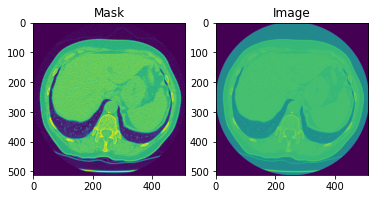

In [17]:

# dir='/content/ym/MyDrive/Colab Notebooks/Subject/'


b, n = images_with_masks(dir)

Load images and masks (both are in .npy format)

Images.npy load

load image from drive(.npy) [[[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  ...
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -3024. ... -3024. -3024. -3024.]]]
(3, 512, 512)
imgs_to_process[0] [[-3024. -3024.

Text(0.5, 1.0, 'image')

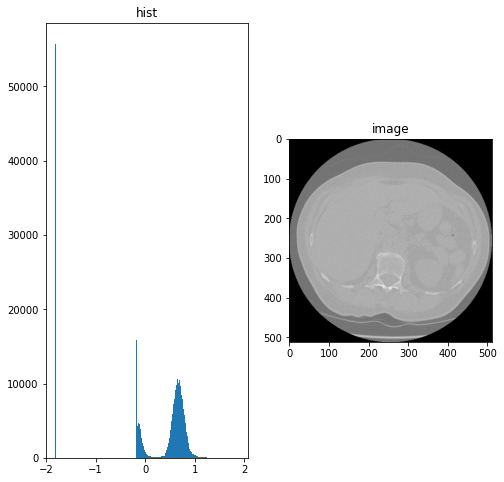

In [18]:
r = '/content/ym/MyDrive/Colab Notebooks/Output/Output_images/images_0528.npy'

imgs_to_process = np.load(r).astype(np.float64) 

print('load image from drive(.npy)', imgs_to_process)
print(imgs_to_process.shape)

img = imgs_to_process[0]

print('imgs_to_process[0]',imgs_to_process[0])
#Standardize the pixel values
mean = np.mean(img)
print('mean   ', mean)

std = np.std(img)
print('std   ', std)

img = img-mean
img = img/std
print('img ...... after mean std  ', img)
print('img  shape...... after mean std   ', img.shape)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.hist(img.flatten(),bins=200)
plt.title('hist')

plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('image')



In [26]:
from PIL import Image
print(imgs_to_process.shape)
#im.save("your_file.jpeg")

(3, 512, 512)
